In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, Huber
import keras_tuner as kt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/processed_cryptodata.csv")

In [3]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\anand\AppData\Local\Temp\ipykernel_10120\1383876153.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [4]:
df.shape

(7200, 25)

In [5]:
crypto ="Cardano"

In [6]:
# Selecting relevant columns for LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
target = 'Close'

In [12]:
crypto_df = df[df['Crypto'] == crypto].drop(columns=['Crypto']).dropna()

In [13]:
crypto_df.shape

(707, 24)

In [14]:
crypto_df.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
VWAP              0
Volume            0
Count             0
Volatility        0
Price_Change      0
RSI               0
MA_7              0
MA_14             0
Close_Lag_1       0
Close_Lag_2       0
Close_Lag_3       0
Rolling_Std_7     0
Rolling_Std_14    0
EMA_7             0
EMA_14            0
MACD              0
Day_of_Week       0
Month             0
Week_of_Year      0
dtype: int64

In [15]:
crypto_df.head()

,Timestamp,Open,High,Low,Close,VWAP,Volume,Count,Volatility,Price_Change,...,Close_Lag_2,Close_Lag_3,Rolling_Std_7,Rolling_Std_14,EMA_7,EMA_14,MACD,Day_of_Week,Month,Week_of_Year
733,2023-03-08,0.330542,0.332544,0.313700,0.317677,0.323078,8.629619e+06,3328,0.018844,-0.012672,...,0.330405,0.337121,0.010378,0.018303,0.334586,0.346380,-0.011794,2,3,10
734,2023-03-09,0.317491,0.321789,0.302002,0.310378,0.311518,1.100000e+07,4267,0.019787,-0.007299,...,0.330349,0.330405,0.011448,0.018579,0.328534,0.341580,-0.013046,3,3,10
735,2023-03-10,0.309419,0.318868,0.297952,0.315781,0.308416,8.025983e+06,3818,0.020916,0.005403,...,0.317677,0.330349,0.010701,0.019080,0.325346,0.338140,-0.012794,4,3,10
736,2023-03-11,0.315907,0.325510,0.303500,0.307455,0.312547,1.200000e+07,5344,0.022010,-0.008326,...,0.310378,0.317677,0.011326,0.020058,0.320873,0.334049,-0.013176,5,3,10
737,2023-03-12,0.307150,0.332887,0.303409,0.332354,0.316051,1.260000e+07,6487,0.029478,0.024899,...,0.315781,0.310378,0.010315,0.017940,0.323743,0.333823,-0.010079,6,3,10


In [16]:
cleaned_csv_path = "C:/Users/anand/Documents/Capstone Files Dump//Test case 1/separatemodeltraining/cleaned_cardano_data.csv"
crypto_df.to_csv(cleaned_csv_path, index=False)

# Confirm file saved
print(f"Cleaned dataset saved at: {cleaned_csv_path}")

Cleaned dataset saved at: C:/Users/anand/Documents/Capstone Files Dump//Test case 1/separatemodeltraining/cleaned_cardano_data.csv


In [17]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/cleaned_cardano_data.csv")

In [18]:
df = df.sort_values(by=['Timestamp'])

SARIMAX

In [22]:
import pandas as pd

data_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/cleaned_cardano_data.csv"
df = pd.read_csv(data_path)

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y", dayfirst=True)
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)

# Define target variable (Close price)
close_prices = df['Close']

# Define exogenous features
features = ['MACD', 'EMA_7', 'Close_Lag_1']
exog_features = df[features]

# Display first few rows
print(df.head())

                Open      High       Low     Close      VWAP        Volume  \
Timestamp                                                                    
2023-03-08  0.330542  0.332544  0.313700  0.317677  0.323078  8.629619e+06   
2023-03-09  0.317491  0.321789  0.302002  0.310378  0.311518  1.100000e+07   
2023-03-10  0.309419  0.318868  0.297952  0.315781  0.308416  8.025983e+06   
2023-03-11  0.315907  0.325510  0.303500  0.307455  0.312547  1.200000e+07   
2023-03-12  0.307150  0.332887  0.303409  0.332354  0.316051  1.260000e+07   

            Count   Crypto  Volatility  Price_Change  ...  Close_Lag_2  \
Timestamp                                             ...                
2023-03-08   3328  Cardano    0.018844     -0.012672  ...     0.330405   
2023-03-09   4267  Cardano    0.019787     -0.007299  ...     0.330349   
2023-03-10   3818  Cardano    0.020916      0.005403  ...     0.317677   
2023-03-11   5344  Cardano    0.022010     -0.008326  ...     0.310378   
2023-03-1

In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test on Close Price
adf_test = adfuller(close_prices)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("✅ Data is stationary, ARIMA can be applied directly (d=0).")
else:
    print("⚠️ Data is non-stationary, differencing is required (d>0).")

ADF Statistic: -1.8802366999464353
p-value: 0.34141473739244443
⚠️ Data is non-stationary, differencing is required (d>0).


In [25]:
# Apply first-order differencing if needed
diff_close_prices = close_prices.diff().dropna()

# Perform ADF test again
adf_test_diff = adfuller(diff_close_prices)

print(f"After Differencing - ADF Statistic: {adf_test_diff[0]}")
print(f"After Differencing - p-value: {adf_test_diff[1]}")

if adf_test_diff[1] < 0.05:
    print("✅ Data is now stationary, ARIMA can be applied with d=1.")
else:
    print("⚠️ Still non-stationary, consider d=2.")

After Differencing - ADF Statistic: -5.4801498636056225
After Differencing - p-value: 2.294000692423253e-06
✅ Data is now stationary, ARIMA can be applied with d=1.


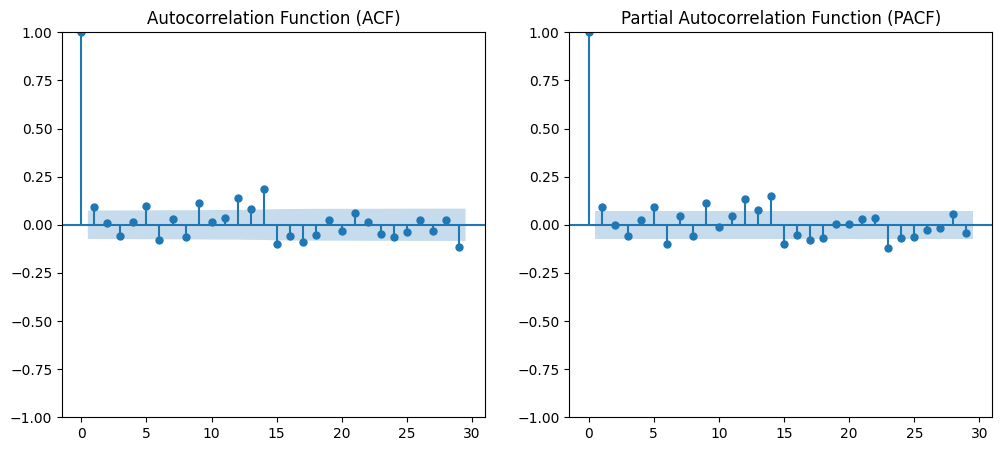

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (for q)
plot_acf(diff_close_prices, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot (for p)
plot_pacf(diff_close_prices, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [27]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define possible values for p, d, q, P, D, Q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = [7]  # Weekly seasonality

best_mae = float("inf")
best_params = None
best_model = None

# Grid search over all combinations
for param in itertools.product(p, d, q, P, D, Q, s):
    try:
        model = SARIMAX(close_prices, exog=exog_features, order=param[:3], seasonal_order=param[3:])
        result = model.fit(disp=False)
        
        # Forecast for last 30 days
        forecast = result.forecast(steps=30, exog=exog_features.iloc[-30:])
        
        # Compute MAE
        mae = mean_absolute_error(close_prices[-30:], forecast)
        
        if mae < best_mae:
            best_mae = mae
            best_params = param
            best_model = result
    
    except:
        continue

print(f"✅ Best SARIMAX Parameters: {best_params} with MAE: {best_mae}")

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred fr

✅ Best SARIMAX Parameters: (0, 0, 0, 0, 1, 1, 7) with MAE: 0.02778719068553777


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the final optimized SARIMAX model
sarimax_final = SARIMAX(close_prices, exog=exog_features,
                        order=(0, 0, 0), seasonal_order=(0, 1, 1, 7))
sarimax_result_final = sarimax_final.fit()

# Print summary of the final model
print(sarimax_result_final.summary())

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                 SARIMAX Results                                 
Dep. Variable:                     Close   No. Observations:                  707
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood                1694.142
Date:                   Mon, 07 Apr 2025   AIC                          -3378.283
Time:                           12:35:19   BIC                          -3355.528
Sample:                       03-08-2023   HQIC                         -3369.487
                            - 02-11-2025                                         
Covariance Type:                     opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MACD            0.8400      0.028     30.484      0.000       0.786       0.894
EMA_7           0.7474      0.028     26.853      0.000       0.693       0.802
Close_Lag_1     0.2277  

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Forecast next 30 days
sarimax_forecast = sarimax_result_final.forecast(steps=30, exog=exog_features.iloc[-30:])

# Compute Performance Metrics
mae_sarimax = mean_absolute_error(close_prices[-30:], sarimax_forecast)
mse_sarimax = mean_squared_error(close_prices[-30:], sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(close_prices[-30:], sarimax_forecast)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R-squared": r2_sarimax
}

print("📊 Final SARIMAX Performance Metrics:", sarimax_performance)


📊 Final SARIMAX Performance Metrics: {'MAE': np.float64(0.02778719068553777), 'MSE': np.float64(0.0013444983821116771), 'RMSE': np.float64(0.03666740217293389), 'R-squared': 0.921902910142109}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


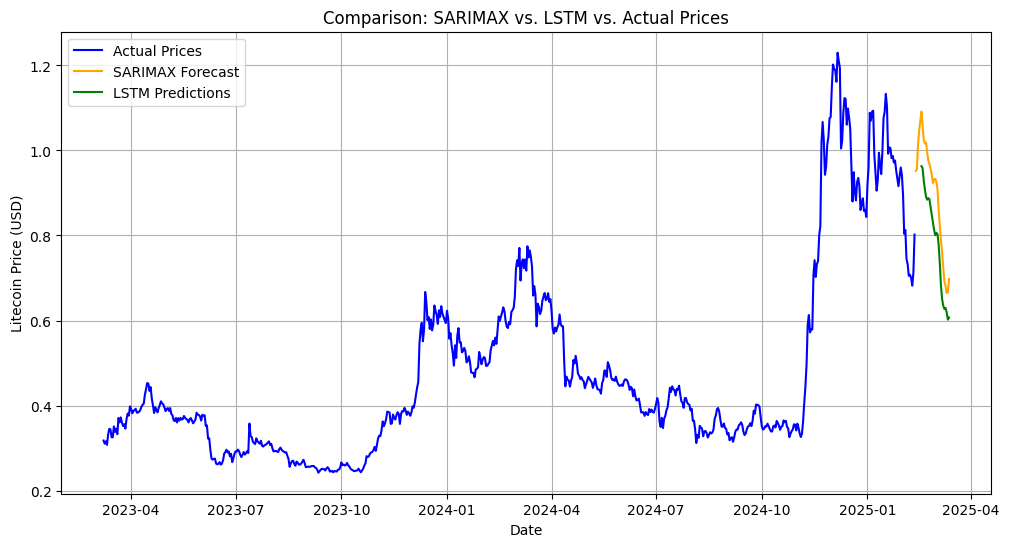

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load trained LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Cardano.h5"
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-30:]  # Last 30 days for testing
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features)-1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Generate future dates for plotting (30 days ahead)
final_future_dates = pd.date_range(start=close_prices.index[-1], periods=30 + 1, freq='D')[1:]

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = final_future_dates[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label="Actual Prices", color='blue')
plt.plot(final_future_dates, sarimax_forecast, label="SARIMAX Forecast", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predictions", color='green')

plt.xlabel('Date')
plt.ylabel('Litecoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices")
plt.legend()
plt.grid()
plt.show()

In [32]:
# Save the trained SARIMAX model
sarimax_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/SARIMAX_model/SARIMAX_Cardano.pkl"
sarimax_result_final.save(sarimax_model_path)

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



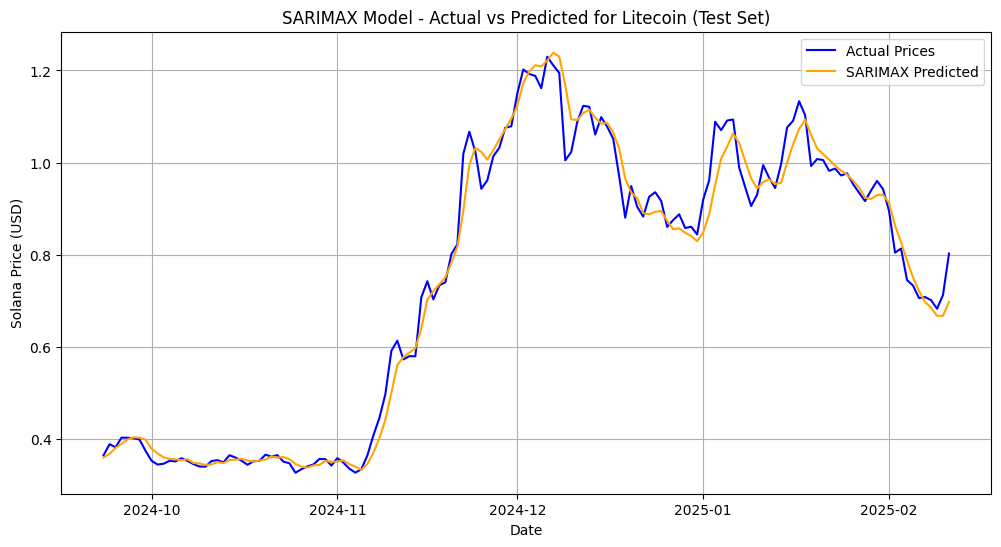

{'MAE': np.float64(0.025670159431736016),
 'MSE': np.float64(0.0014662413457441406),
 'RMSE': np.float64(0.03829153099242887),
 'R² Score': 0.9839810523162156}

In [33]:
# Split data into 80% train and 20% test sets
train_size = int(len(close_prices) * 0.8)
train_y, test_y = close_prices[:train_size], close_prices[train_size:]
train_exog, test_exog = exog_features[:train_size], exog_features[train_size:]

# Train SARIMAX using best-found parameters
sarimax_model = SARIMAX(train_y, exog=train_exog, order=(0, 0, 0), seasonal_order=(0, 1, 1, 7))
sarimax_result = sarimax_model.fit(disp=False)

# Predict for the test set
sarimax_pred = sarimax_result.predict(start=len(train_y), end=len(close_prices)-1, exog=test_exog)

# Compute Performance Metrics for SARIMAX
mae_sarimax = mean_absolute_error(test_y, sarimax_pred)
mse_sarimax = mean_squared_error(test_y, sarimax_pred)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(test_y, sarimax_pred)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R² Score": r2_sarimax
}

# Plot SARIMAX predictions vs Actual values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')

plt.xlabel('Date')
plt.ylabel('Solana Price (USD)')
plt.title("SARIMAX Model - Actual vs Predicted for Litecoin (Test Set)")
plt.legend()
plt.grid()
plt.show()

# Display SARIMAX performance
sarimax_performance

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


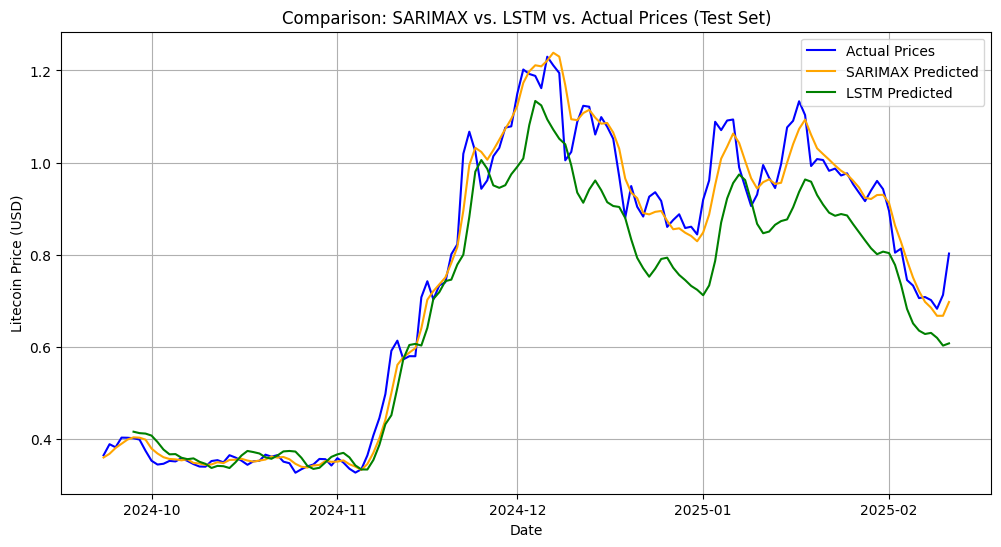

In [34]:
# Load the trained LSTM model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Define path to LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Cardano.h5"

# Load the model
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-len(test_y):]  # Use test data for LSTM
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# Generate LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features) - 1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = test_y.index[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predicted", color='green')

plt.xlabel('Date')
plt.ylabel('Litecoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices (Test Set)")
plt.legend()
plt.grid()
plt.show()